# Cosine similarity from image Encoder

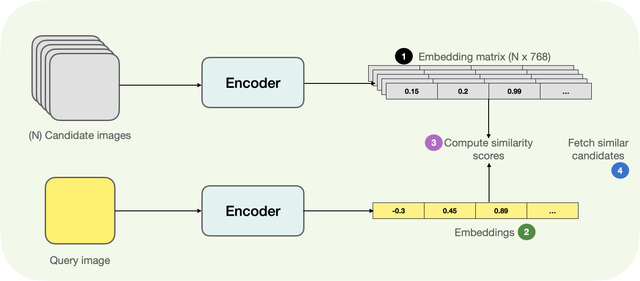

In [1]:
!pip install transformers datasets -q 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## load model for embbeding

In [65]:
from transformers import AutoFeatureExtractor, AutoModel

model_ckpt = "supachaisupanya/swinv2-base-patch4-window16-256_drawing"
extractor = AutoFeatureExtractor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)
hidden_dim = model.config.hidden_size

c:\Users\Admin\Desktop\drawing greding\code\drawing\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [66]:
import torch

In [84]:
import torchvision.transforms as T


# Data transformation chain.
transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [118]:
import torch
import torchvision.transforms as T

def preprocess_image(image_path, transformation_chain):
    """
    Preprocesses the input image.
    
    Args:
        image_path (str): Path to the input image.
        transformation_chain (torchvision.transforms.Compose): Transformation chain for preprocessing.
        
    Returns:
        torch.Tensor: Preprocessed image tensor.
    """
    image = Image.open(image_path)
    image_tensor = transformation_chain(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

def extract_embeddings_from_image(image_tensor, model):
    """
    Extracts embeddings from the input image tensor using the provided model.
    
    Args:
        image_tensor (torch.Tensor): Preprocessed image tensor.
        model (torch.nn.Module): Model for extracting embeddings.
        
    Returns:
        torch.Tensor: Embeddings tensor.
    """
    device = next(model.parameters()).device  # Get device of the model
    with torch.no_grad():
        embeddings = model(image_tensor.to(device)).last_hidden_state[:, 0].cpu()
    return embeddings

# Example usage:
image1_path = "./minitrain/00000000/0.png"
image1_tensor = preprocess_image(image1_path, transformation_chain)
embeddings1 = extract_embeddings_from_image(image1_tensor, model)
print(f"emd1 = {embeddings1}")

image2_path = "./minitrain/00000005/0.png"
image2_tensor = preprocess_image(image2_path, transformation_chain)
embeddings2 = extract_embeddings_from_image(image2_tensor, model)
print(f"emd2 = {embeddings2}")

def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two vectors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()
compute_scores(embeddings1,embeddings2)

emd1 = tensor([[ 0.6491, -0.5197, -0.2736,  ..., -0.4500,  2.6684,  0.3992]])
emd2 = tensor([[ 1.6654,  0.7420,  1.7211,  ..., -1.5797,  1.9354,  1.4293]])


[0.10645487159490585]

In [105]:
def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two vectors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()
compute_scores(embeddings1,embeddings2)

[0.9999998807907104]

In [63]:
im1 = Image.open("./minitrain/00000000/0.png")
im1 = extractor(im1)

In [64]:
result = model(im1)

AttributeError: 